In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

plt.rcParams.update({'mathtext.default': 'regular',
                    'font.family': 'Times'})

In [6]:
df = pd.read_csv('/Users/sharifi/Downloads/scifi_dataset.csv')
coords = SkyCoord(ra=df.ra.values, dec=df.dec.values)
ra = coords.ra.value
dec = coords.dec.value
df['ra'] = ra
df['dec'] = dec
ra_deg = df.ra
dec_deg = df.dec

ra_rad = np.radians(ra_deg)
ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)
ra_rad[ra_rad > np.pi] -= 2*np.pi
ra_rad = -ra_rad

dec_rad = np.radians(dec_deg)

df['ra_rad'] = ra_rad
df['dec_rad'] = dec_rad

nam = 'Arcturus'
user_star = SkyCoord.from_name(nam)
us_ra = user_star.ra.value
us_dec = user_star.dec.value
us_ra_rad = np.radians(us_ra)
us_ra_rad = np.remainder(us_ra_rad + 2*np.pi, 2*np.pi)
us_ra_rad -= 2 * np.pi if us_ra_rad > np.pi else 0
us_ra_rad = -us_ra_rad
us_dec_rad = np.radians(us_dec)

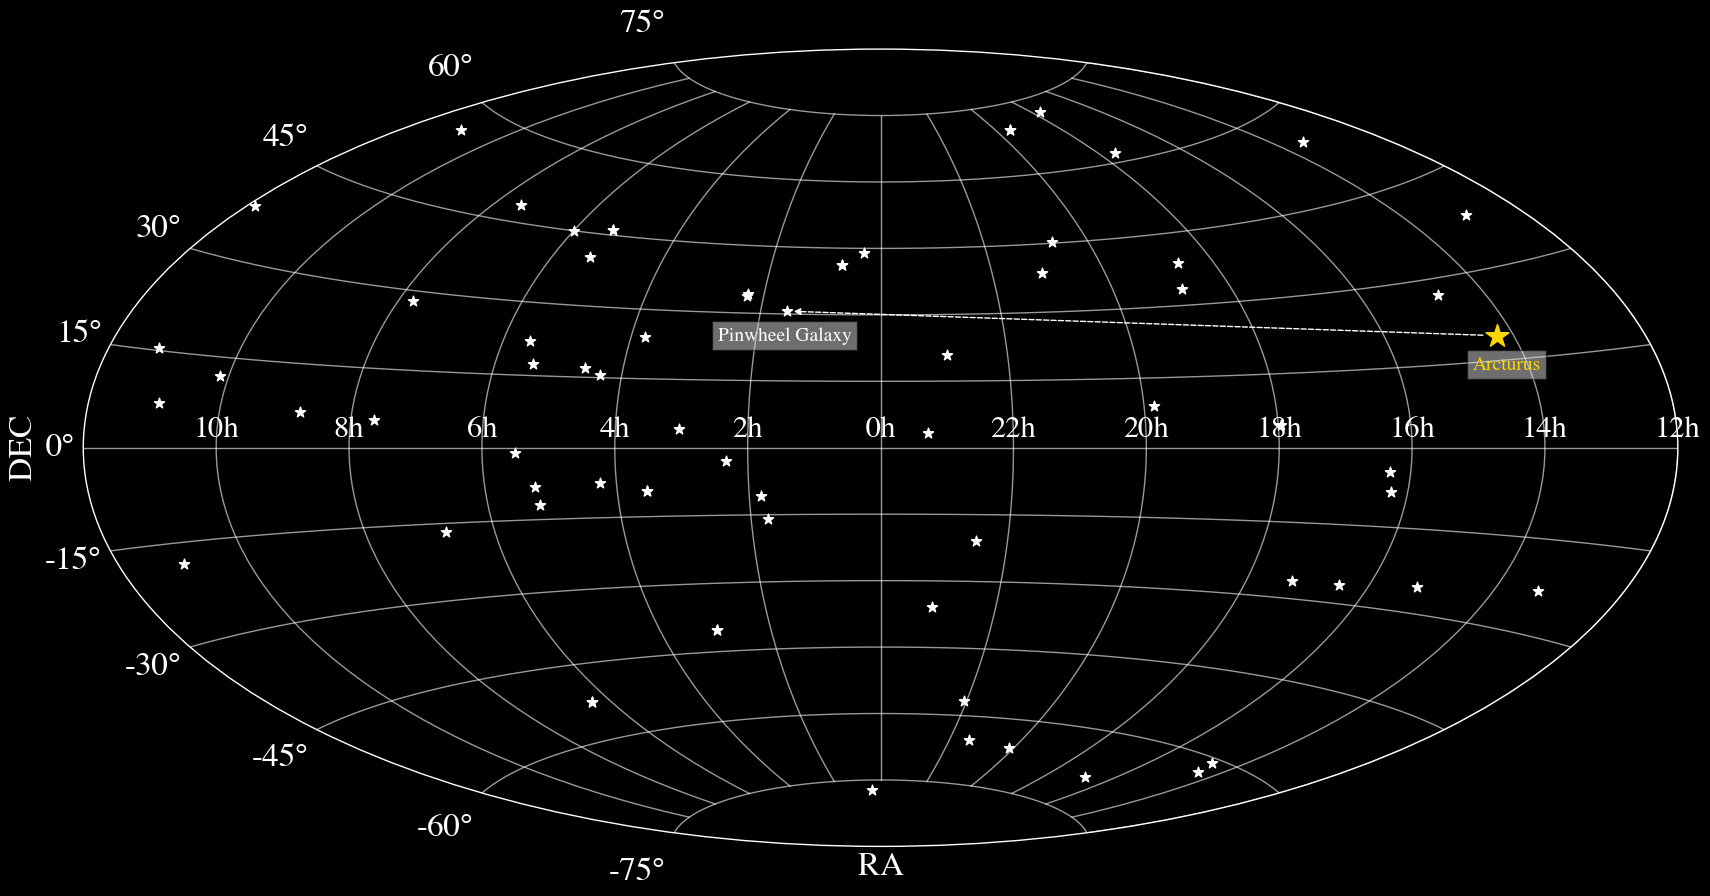

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'aitoff'}, figsize=(26,9))

fig.patch.set_facecolor('black')           # Background of the figure
ax.set_facecolor('black')                  # Background of the plot area

ax.scatter(ra_rad, dec_rad, c='white', marker='*', s=60)
ax.scatter(us_ra_rad, us_dec_rad, c='gold', marker='*', s=300)
# ax.scatter(us_ra_rad, us_dec_rad, facecolors='none', edgecolors='white', marker='o', s=300, lw=1.5)


ra_hour_ticks_deg = np.arange(0, 360, 30)  # 0h to 23h
ra_hour_ticks_rad = -np.radians(np.remainder(ra_hour_ticks_deg, 360))  # Negate!
ra_hour_ticks_rad = np.remainder(ra_hour_ticks_rad + 2*np.pi, 2*np.pi)
ra_hour_ticks_rad[ra_hour_ticks_rad > np.pi] -= 2*np.pi
ra_hour_labels = [f'{int((deg / 15) % 24)}h' for deg in ra_hour_ticks_deg]
ax.set_xticks(ra_hour_ticks_rad)
ax.set_xticklabels(ra_hour_labels, fontsize=16, color='white')

dec_ticks_rad = ax.get_yticks()
dec_ticks_deg = np.degrees(dec_ticks_rad)
dec_tick_labels = [f"{int(np.round(deg))}°" for deg in dec_ticks_deg]
ax.set_yticks(dec_ticks_rad)
ax.set_yticklabels(dec_tick_labels, color='white', fontsize=24)

ax.spines['geo'].set_edgecolor('white')
ax.spines['geo'].set_linewidth(1)

ax.set_xlabel(r'$RA$', fontsize=24, color='white')
ax.set_ylabel(r'$DEC$', fontsize=24, color='white')

ax.xaxis.set_tick_params(labelsize=22, color='white')
ax.yaxis.set_tick_params(labelsize=24, color='white')

ix = 9
ax.annotate(
    '',                          # No text
    xy=(ra_rad.iloc[ix], dec_rad.iloc[ix]),                 # Arrowhead (end) point
    xytext=(us_ra_rad, us_dec_rad),             # Start point
    arrowprops=dict(
        arrowstyle='-|>',        # Style: simple arrow
        color='white',          # Arrow color
        lw=1,                   # Line width
        linestyle='--',
        shrinkA=10,
        shrinkB=5
    ), zorder=-9999
)

ax.text(us_ra_rad, us_dec_rad-.06, nam, ha='center', va='top', color='gold', fontsize=14, bbox=dict(facecolor='gainsboro', alpha=0.5))
ax.text(ra_rad.iloc[ix], dec_rad.iloc[ix]-.06, df['name'].iloc[ix], ha='center', va='top', color='white', 
        fontsize=14, bbox=dict(facecolor='gainsboro', alpha=.5))

ax.grid(True, alpha=.6, color='white', linewidth=1)
plt.tight_layout()
plt.show()